In [2]:
# Python Software Package Installation
import sys
!{sys.executable} -m pip install adafruit-blinka adafruit-circuitpython-msa301 hidapi adafruit-circuitpython-lsm303-accel ipympl

# Set an Environment Variable so Adafruit Blinka knows we're using the MCP2221
import os
os.environ["BLINKA_MCP2221"] = "1"

In [3]:
import board
import busio
import adafruit_lsm303_accel

i2c = busio.I2C(board.SCL, board.SDA)
accel = adafruit_lsm303_accel.LSM303_Accel(i2c)

In [4]:
print("Acceleration (m/s^2): X=%0.3f Y=%0.3f Z=%0.3f"%accel.acceleration)


Acceleration (m/s^2): X=-0.382 Y=-5.010 Z=7.840


<IPython.core.display.Javascript object>


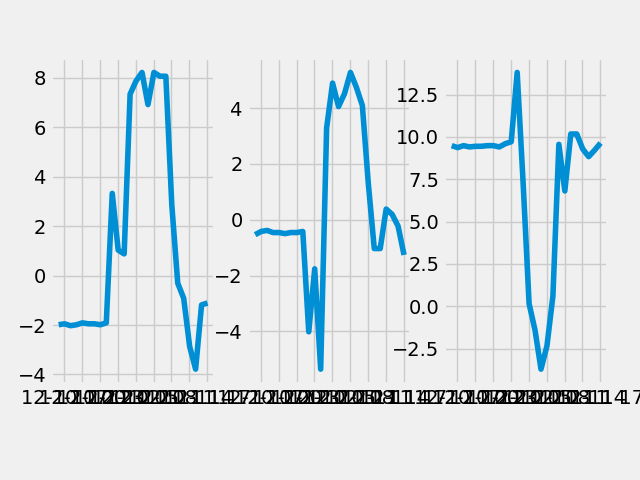

In [6]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from matplotlib.animation import FuncAnimation
%matplotlib notebook

# Stylize the plot
plt.style.use('fivethirtyeight')

# 3x side-by-side subplots
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.set_title('LSM303AGR X')
ax2.set_title('LSM303AGR Y')
ax3.set_title('LSM303AGR Z')

# Global x-axis array
x_vals = []
# Accelerometer axis data
accel_x = []
accel_y = []
accel_z = []

def animate(i):
    # Poll the LSM303AGR, store in accel_axis arrays
    accel_x.append(accel.acceleration[0])
    accel_y.append(accel.acceleration[1])
    accel_z.append(accel.acceleration[2])
    # Grab the datetime, auto-range based on length of accel_x array
    x = [datetime.datetime.now() + datetime.timedelta(hours=i) for i in range(len(accel_x))]
    plt.gcf().autofmt_xdate()
    # Clear all axis
    ax1.cla()
    ax2.cla()
    ax3.cla()
    # Plot for each sub-plot
    ax1.plot(x, accel_x)
    ax2.plot(x, accel_y)
    ax3.plot(x, accel_z)

# Update graph every 125ms
ani = animation.FuncAnimation(plt.gcf(), animate, interval=125)
